**Import the necessary modules and prepare the data**

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [3]:
rawBostonData = rawBostonData.dropna()
rawBostonData = rawBostonData.drop_duplicates() 
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10 
test_data_size = 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

**Exercise 2.04: Fit a simple linear regression model using the Statsmodels formula API**

In [12]:
# Use the statsmodels API to create a simple linear regression

linearModel = smf.ols(formula="crimeRatePerCapita ~ medianValue_Ks + 1", data=train_data)
linearModelResult = linearModel.fit()

print(linearModelResult.summary())


                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.56e-13
Time:                        22:10:06   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

In [13]:
linearModelResult.conf_int()

,0,1
Intercept,9.086830,13.332027
medianValue_Ks,-0.439912,-0.260588


<AxesSubplot:ylabel='Frequency'>

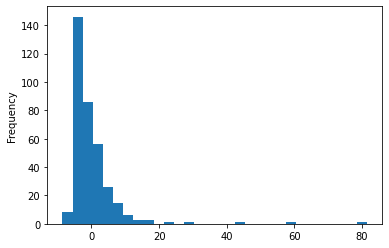